# Chat bot development
## Developer: Yogesh Awdhut Gadade

#### Input dataset: Topical chat (Amazon Alexa AI) 

In [182]:
from pandas import DataFrame, read_json, read_csv
import gc          # Garbage collector

#### Versions of python and packages used in this notebook:
1. Python: 3
2. Pandas: 1.0.5 (!pip show pandas)

# Steps:

### Pre-processing of dataset:
Start with ready to use data from Kaggle which is derived from original data

OR later try :

- Bring dataset into X and Y form
- Prepare X axis text by applying NLP 

### Models trying out

1. Implement & evaluate performance of pretrained HuggingFace Library ( Transformer in the backend )
2. Implement & evaluate performance of model ______ built using NLTK
3. Implement & evaluate performance of model LSTM RNN
4. Implement & evaluate performance of model using Transformer if needed 


#### NOTE from 2  to 4 pipeline cab be formed to select the best one

1. For evaluation can try out cross validation
2. Can we use grid search


In [183]:
strInputDirPath=".//input//train.json" # Set current input directory path

In [184]:
pdInputJson=read_json(strInputDirPath)
pdInputJson

,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,t_1abc9c37-387d-4013-8691-88ef8c010e58,t_1a600621-5ad4-409c-a812-bc0b2bb03aa6,t_01269680-99c3-4ab4-9df3-23901e0623c9,t_c4f84350-a9e8-4928-bde8-5193b62388e0,t_222ac48a-a52e-401a-a1c9-b2436edd8096,t_38454270-bfca-4263-8513-3fb4a05fd376,t_23942b1a-e379-41bd-826d-3e500f4f0e1a,t_f289d280-afcd-46f5-97e1-64a9e3aedc70,t_d61bd2b1-d554-406f-afb9-5a745a7a9ad1,...,t_529686fc-67c8-4704-9936-817817f272cf,t_c8a4d93f-bfba-4e95-a342-ac392d36d3ed,t_8d364c09-a99c-482a-a4ab-1903d093092c,t_6ff1ae46-0769-453f-8977-b62ac551e79d,t_658b2314-fa4e-4ae8-b69f-eb36f132ca58,t_56ef264f-af34-42ff-ac54-0f8d5a47e8b4,t_1a8383a5-2c8d-4687-b26e-3434b6d7fd91,t_46a82c75-d203-49c5-9d9a-2e03085d829b,t_e959a00e-5928-411f-9933-347edb6edf6b,t_884c3d36-67da-41a1-b432-6aa8601d31f7
article_url,https://www.washingtonpost.com/blogs/compost/w...,https://www.washingtonpost.com/entertainment/t...,https://www.washingtonpost.com/blogs/compost/w...,https://www.washingtonpost.com/entertainment/t...,https://www.washingtonpost.com/entertainment/t...,https://www.washingtonpost.com/blogs/compost/w...,https://www.washingtonpost.com/news/comic-riff...,https://www.washingtonpost.com/news/comic-riff...,https://www.washingtonpost.com/lifestyle/kidsp...,https://www.washingtonpost.com/lifestyle/style...,...,https://www.washingtonpost.com/news/early-lead...,http://www.washingtonpost.com/education/2018/0...,http://www.washingtonpost.com/education/2018/0...,http://www.washingtonpost.com/education/2018/0...,https://www.washingtonpost.com/news/early-lead...,https://www.washingtonpost.com/news/early-lead...,https://www.washingtonpost.com/news/early-lead...,https://www.washingtonpost.com/news/early-lead...,https://www.washingtonpost.com/sports/colleges...,https://www.washingtonpost.com/sports/colleges...
config,C,B,C,C,B,A,B,C,D,B,...,D,B,D,C,D,B,B,C,A,B
content,[{'message': 'Are you a fan of Google or Micro...,"[{'message': 'do you like dance?', 'agent': 'a...",[{'message': 'Hey what's up do use Google very...,"[{'message': 'Hi! do you like to dance?', 'ag...","[{'message': 'do you like dance?', 'agent': 'a...","[{'message': 'hi, do you use google much?', 'a...","[{'message': 'Do you like comic books?', 'agen...",[{'message': 'Can you believe there is stars t...,[{'message': 'Are you a Star Wars fan? I need ...,"[{'message': 'Naming a cloned cat ""copy cat"", ...",...,"[{'message': 'Good morning, are you a football...","[{'message': 'Good Afternoon!', 'agent': 'agen...",[{'message': 'Hi! Do you know a lot about sho...,"[{'message': 'I love shoes, in fact I have a c...","[{'message': 'Hello there, do you watch much t...","[{'message': 'Good Morning!', 'agent': 'agent_...",[{'message': 'Do you watch television at all? ...,"[{'message': 'Do you watch a lot of TV?', 'age...","[{'message': 'Hi, how are you?', 'agent': 'age...",[{'message': 'Are you a fan of football by any...
conversation_rating,"{'agent_1': 'Excellent', 'agent_2': 'Excellent'}","{'agent_1': 'Excellent', 'agent_2': 'Excellent'}","{'agent_1': 'Excellent', 'agent_2': 'Excellent'}","{'agent_1': 'Excellent', 'agent_2': 'Excellent'}","{'agent_1': 'Excellent', 'agent_2': 'Excellent'}","{'agent_1': 'Excellent', 'agent_2': 'Excellent'}","{'agent_1': 'Good', 'agent_2': 'Excellent'}","{'agent_1': 'Passable', 'agent_2': 'Passable'}","{'agent_1': 'Excellent', 'agent_2': 'Good'}","{'agent_1': 'Excellent', 'agent_2': 'Good'}",...,"{'agent_1': 'Good', 'agent_2': 'Good'}","{'agent_1': 'Excellent', 'agent_2': 'Excellent'}","{'agent_1': 'Excellent', 'agent_2': 'Good'}","{'agent_1': 'Excellent', 'agent_2': 'Good'}","{'agent_1': 'Good', 'agent_2': 'Excellent'}","{'agent_1': 'Excellent', 'agent_2': 'Good'}","{'agent_1': 'Good', 'agent_2': 'Good'}","{'agent_1': 'Good', 'agent_2': 'Good'}","{'agent_1': 'Good', 'agent_2': 'Excellent'}","{'agent_1': 'Good', 'agent_2': 'Good'}"


### About original (raw) input dataset

This is a **Topical Chat dataset** from **Amazon**! It consists of over **8000 conversations** and over **184000 messages**!

1. Within each message, there is: A **conversation id**, which is basically which conversation the message takes place in. 
2. Each **message** is either the start of a conversation or a reply from the previous message. 
3. There is also a **sentiment**, which represents the emotion that the person who sent the message is feeling. There are **8 sentiments: Angry, Curious to Dive Deeper, Disguised, Fearful, Happy, Sad, and Surprised**.


Use of this dataset:
- This dataset can be used in machine learning to **simulate a conversation or to make a chatbot**. 
- It can also be used for **data visualization**, for example you could visualize the word usage for the different emotions.


Original github dataset:
https://github.com/alexa/Topical-Chat
Check out this research paper for this dataset: https://m.media-amazon.com/images/G/01/amazon.jobs/3079_Paper._CB1565131710_.pdf


Input in CSV format: 
PS: If you cannot download the dataset, download it from here: https://docs.google.com/spreadsheets/d/1dFdlvgmyXfN3SriVn5Byv_BNtyroICxdgrQKBzuMA1U/edit?usp=sharing






In [185]:
del(pdInputJson)  #Deleting object since not using it in later stages
gc.collect()

2348

In [186]:
pdInputData=read_csv(".//input//topical_chat.csv")
pdInputData.head()

,conversation_id,message,sentiment
0,1,Are you a fan of Google or Microsoft?,Curious to dive deeper
1,1,Both are excellent technology they are helpfu...,Curious to dive deeper
2,1,"I'm not a huge fan of Google, but I use it a...",Curious to dive deeper
3,1,Google provides online related services and p...,Curious to dive deeper
4,1,"Yeah, their services are good. I'm just not a...",Curious to dive deeper


# 1. EDA
1. Total number of samples we have?
2. How many conversation id we have?
3. Avg. no. of messages across all coversations? min and max no. of messages in a conversation?
4. How many types of sentiment we have which are those
5. What is the min and max length of individual message
6. In given total # of samples find out distribution of message with types of sentiment

#### Analysis of messages
1. Length of each messages in all conversations: Avg,  Min, Max

In [187]:
intTotalSamples=len(pdInputData)
pdInputData=pdInputData.drop_duplicates().reset_index()[pdInput.columns]
print(f"Dropped duplicate rows: {intTotalSamples-len(pdInputData)}")
intTotalSamples=len(pdInputData)

Dropped duplicate rows: 30


In [188]:
intTotalConvIds=len(pdInputData.conversation_id.unique())
pdMsgsCountPerConversation=pdInputData.groupby('conversation_id').count()['message']
intMeanNoOfMsgs=round(pdMsgsCountPerConversation.mean())
intMinNoOfMsgs=pdMsgsCountPerConversation.min()
intMaxNoOfMsgs=pdMsgsCountPerConversation.max()
lstTypesOfSentiments=list(pdInputData.sentiment.unique())
print(f"Total no. of samples:                         {intTotalSamples}\
      \nTotal no. of conversations(unique ids):       {intTotalConvIds} \
      \nIn all conversations for messages stat is:    Avg.: {intMeanNoOfMsgs}, Min: {intMinNoOfMsgs}, Max: {intMaxNoOfMsgs}\
      \nTotal no. of types of sentiments: {len(lstTypesOfSentiments)} are:\n {lstTypesOfSentiments}")

Total no. of samples:                         188348      
Total no. of conversations(unique ids):       8628       
In all conversations for messages stat is:    Avg.: 22, Min: 19, Max: 53      
Total no. of types of sentiments: 8 are:
 [' Curious to dive deeper', ' Happy', ' Neutral', ' Surprised', ' Disgusted', ' Sad', ' Fearful', ' Angry']


#### Observation:
1. The total # of samples are more than mentioned in the description on kaggle ( refer to research paper for exact #
2. Same with # of conversations

<AxesSubplot:title={'center':'Count of messages per conversation'}, xlabel='conversation_id'>

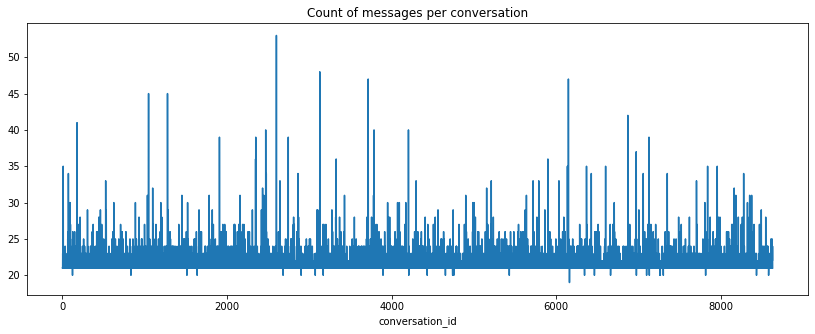

In [189]:
pdMsgsCountPerConversation.plot(figsize=(14,5), title='Count of messages per conversation')

In [190]:
pdMsgsCountPerConversation.describe()  

count    8628.000000
mean       21.829856
std         1.744628
min        19.000000
25%        21.000000
50%        21.000000
75%        22.000000
max        53.000000
Name: message, dtype: float64

### OBSERVATION:
1. About 75% of total conversations having count of msgs between 19 to 22 (75% times count of msgs will lie between [19,22]) 

In [191]:
del(pdMsgsCountPerConversation)
gc.collect()

13

<AxesSubplot:title={'center':'Sentiments-Out of total samples % messages with sentimet'}, xlabel='sentiment'>

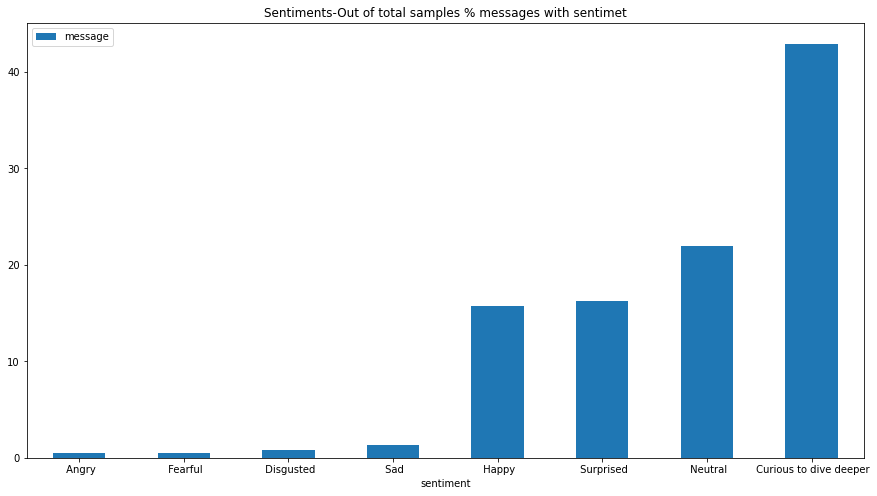

In [192]:
(100*pdInputData.groupby('sentiment').count()[['message']].sort_values(['message'])/intTotalSamples)\
.plot(kind='bar', figsize=(15,8), rot=360, alpha=1.0, title="Sentiments-Out of total samples % messages with sentimet")

### OBSERVATION:
1. Out of total samples % messages with sentiment is not distributed eaqually.
2. More than 40% of messages are of the sentiment curious to dive deeper and others combined is less than 60%

# 2. Preprocessing the Dataset

<AxesSubplot:>

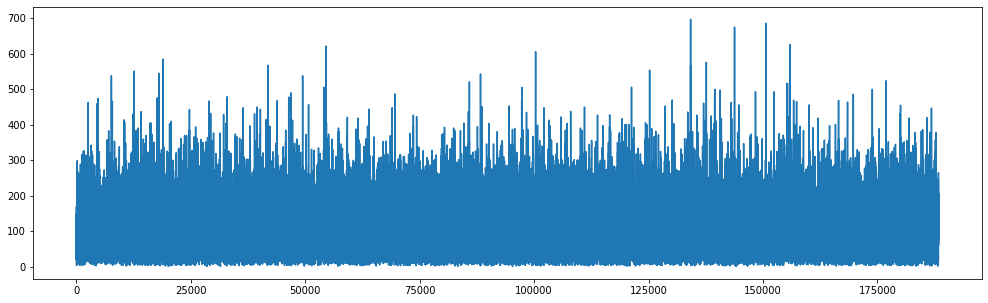

In [193]:
serStmtLenMessages=pdInputData['message'].apply(lambda x: len(x))
serStmtLenMessages.plot(figsize=(17,5))

In [194]:
serStmtLenMessages.describe()

count    188348.000000
mean        104.131830
std          55.694761
min           1.000000
25%          65.000000
50%          96.000000
75%         134.000000
max         697.000000
Name: message, dtype: float64

### OBESERVATION:
1. Statement with length AvgL 104 min 1 and max 697 exists
2. Out of total 75% we have length of statement ranging from 1 to 134 length

# 3. Chat bot training & evaluation